<a href="https://colab.research.google.com/github/Barbod24/LinearControl/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libaries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Read dataset

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1neu-nUibwTJdDXU0bdPQ2oXUqBYQAoY1

Downloading...
From: https://drive.google.com/uc?id=1neu-nUibwTJdDXU0bdPQ2oXUqBYQAoY1
To: /content/Titanic-Dataset.csv
100% 61.2k/61.2k [00:00<00:00, 63.1MB/s]


In [ ]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Examine dataset

Data structure

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Corrolation matrix

In [ ]:
data.drop('PassengerId', axis=1).corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


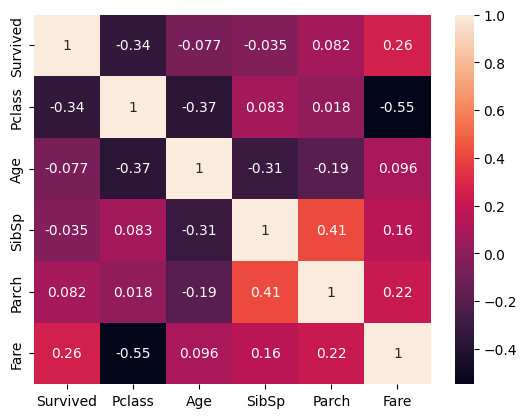

In [ ]:
sns.heatmap(data.drop('PassengerId', axis=1).corr(numeric_only=True), annot=True)
plt.show()

Scatter plot

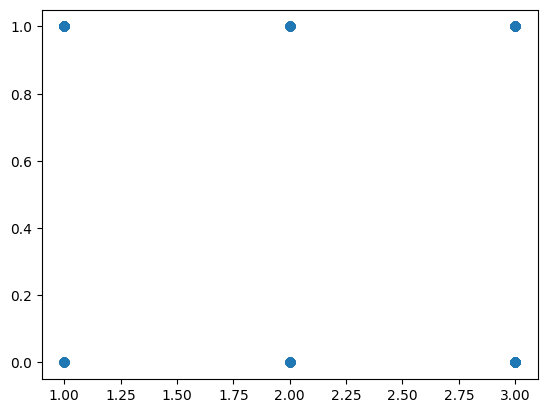

In [ ]:
plt.scatter(data['Pclass'], data['Survived'])
plt.show()

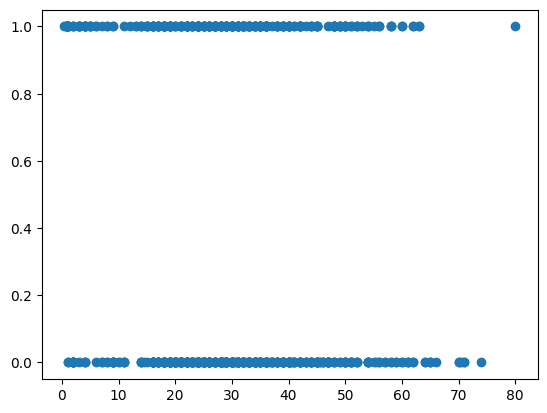

In [ ]:
plt.scatter(data['Age'], data['Survived'])
plt.show()

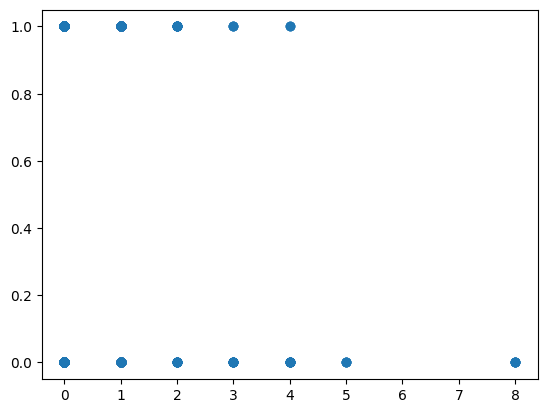

In [ ]:
plt.scatter(data['SibSp'], data['Survived'])
plt.show()

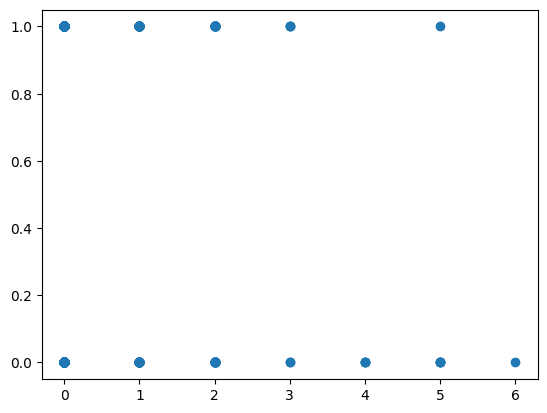

In [ ]:
plt.scatter(data['Parch'], data['Survived'])
plt.show()

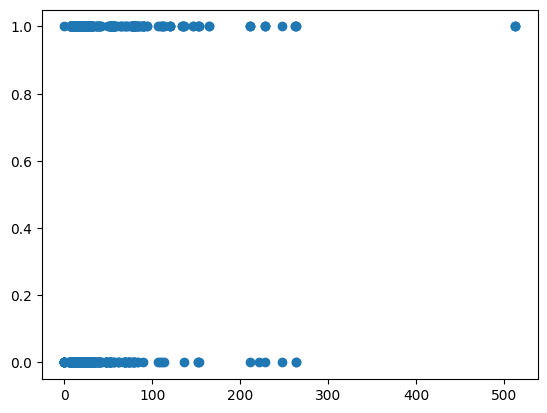

In [ ]:
plt.scatter(data['Fare'], data['Survived'])
plt.show()

Hexbin plot

In [ ]:
def hexplt(data,x,y, gridsize):
    plt.hexbin(data[x],data[y], gridsize=gridsize,cmap='plasma')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.colorbar()
    plt.show()

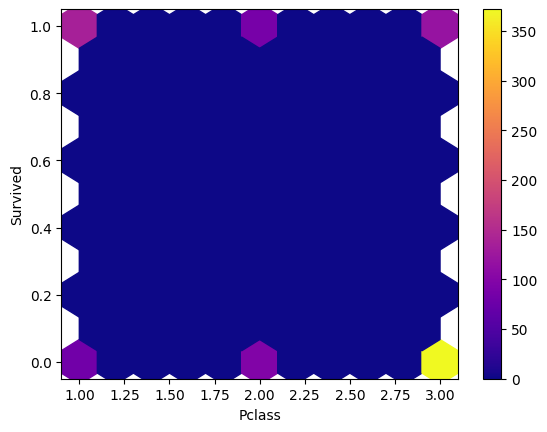

In [ ]:
hexplt(data,'Pclass','Survived',10)

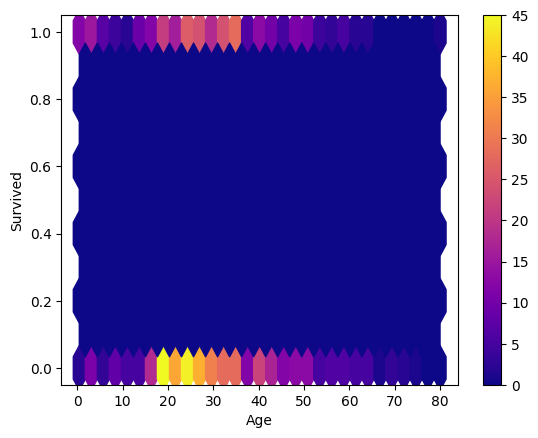

In [ ]:
hexplt(data,'Age','Survived',(30,5))

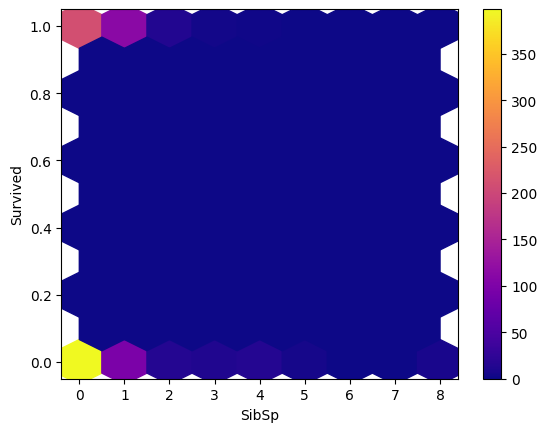

In [ ]:
hexplt(data,'SibSp','Survived',(8,5))

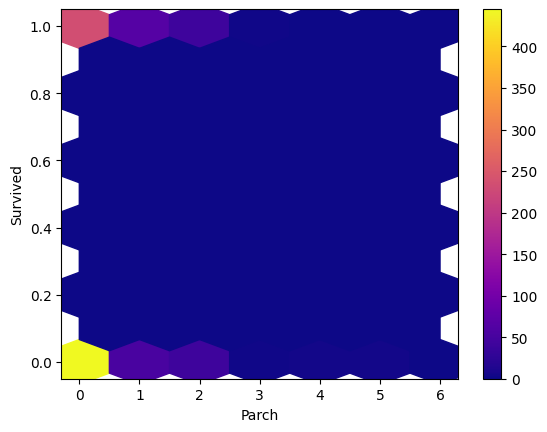

In [ ]:
hexplt(data,'Parch','Survived',(6,5))

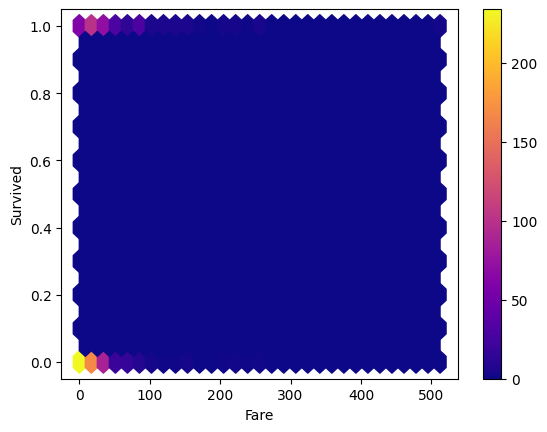

In [ ]:
hexplt(data,'Fare','Survived',(30,10))

Scatter plot with plotly

In [ ]:
px.scatter(data,x='Age',y='Fare',color='Survived')

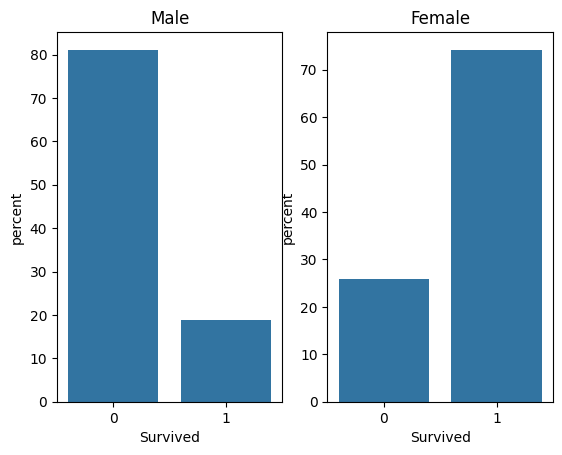

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=2)
sns.countplot(data[data['Sex']=='male'],x='Survived',stat='percent',ax=ax[0])
ax[0].set_title('Male')
sns.countplot(data[data['Sex']=='female'],x='Survived',stat='percent',ax=ax[1])
ax[1].set_title('Female')
plt.show()

In [ ]:
def survivepercent(data,x):
    new_data = data.value_counts([x,'Survived']).reset_index()
    new_data['number'] = new_data.groupby(x)['count'].transform('sum')
    new_data['percent'] = 100 * new_data['count']/new_data['number']
    return new_data[new_data['Survived']==1][[x,'percent']].sort_values(x).reset_index(drop=True)

In [ ]:
survivepercent(data,'Sex')

,Sex,percent
0,female,74.203822
1,male,18.890815


Family members count

In [ ]:
data['Family'] = data['SibSp'] + data['Parch']
survivepercent(data,'Family')

,Family,percent
0,0,30.353818
1,1,55.279503
2,2,57.843137
3,3,72.413793
4,4,20.000000
5,5,13.636364
6,6,33.333333


Alone

In [ ]:
data['Alone'] = (data['Family'] == 0).astype(int)
survivepercent(data,'Alone')

,Alone,percent
0,0,50.564972
1,1,30.353818


Age classification

In [ ]:
def ageclassifier(age):
    if age < 13:
        return 'child'
    elif age < 18:
        return 'teenager'
    elif age < 36:
        return 'young'
    elif age < 66:
        return 'adult'
    elif pd.isna(age):
        return pd.NA
    else:
        return 'old'

In [ ]:
data['Age class'] = data['Age'].apply(ageclassifier)
survivepercent(data,'Age class')

,Age class,percent
0,adult,39.234450
1,child,57.971014
2,old,12.500000
3,teenager,47.727273
4,young,38.020833


Preprocces dataset

Missing values

Number and ratio of missing values

In [ ]:
def missvalue_count(data):
    miss_numb = data.isnull().sum()
    miss_numb = miss_numb[miss_numb > 0]
    miss_perc = miss_numb/len(data)*100
    miss = pd.concat((miss_numb, miss_perc),axis=1)
    miss.rename(columns={0:'Number',1:'Percent'}, inplace=True)
    return miss

In [ ]:
missvalue_count(data)

,Number,Percent
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467
Age class,177,19.865320


Categorial data

In [ ]:
data['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
data['Embarked'] = data['Embarked'].fillna('S')

In [ ]:
data21 = data.copy()
data21['Age'] = data21['Age'].fillna(round(data21['Age'].mean(),0))

In [ ]:
data22 = data.copy()
data22['Age'] = data22['Age'].fillna(round(data22['Age'].median(),0))

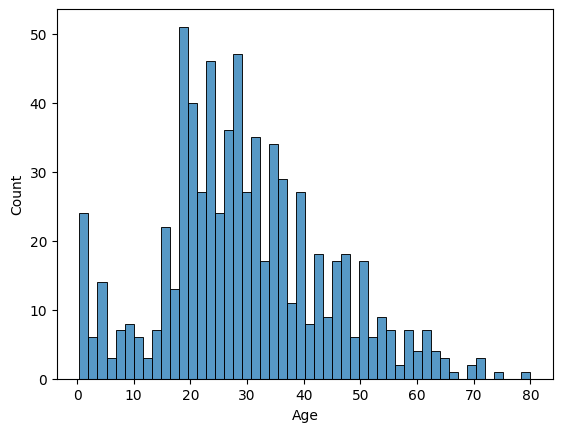

In [ ]:
sns.histplot(data, x='Age', bins = 50)
plt.show()

In [ ]:
data23 = data.copy()
data23['Age'] = data23['Age'].fillna(data23[['Pclass', 'Sex', 'Age']].groupby(['Pclass', 'Sex']).transform('median')['Age'])

In [ ]:
finaldata = data23.drop(['PassengerId','Name','Age class','Alone','Family', 'Ticket', 'Cabin'], axis=1)

String to number

In [ ]:
new_col = pd.get_dummies(finaldata[['Sex', 'Embarked']],dtype=int,drop_first=True)
finaldata = pd.concat((finaldata,new_col),axis=1).drop(['Sex', 'Embarked'], axis = 1)

Standard and normalzie

From skratch

In [ ]:
class standard():
    def fit(self,x):
        self.mean = x.mean()
        self.std = x.std()

    def transform(self,x):
        return (x-self.mean)/self.std

    def fit_transform(self,x):
        self.fit(x)
        return self.transform(x)

In [ ]:
scaler = standard()
finaldata[['Age_standard_fs', 'Fare_standard_fs']] = scaler.fit_transform(finaldata[['Age', 'Fare']])

With SKlearn

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
finaldata[['Age_standard_sk', 'Fare_standard_sk']] = scaler.fit_transform(finaldata[['Age', 'Fare']])

In [ ]:
finaldata[['Age_standard_fs', 'Fare_standard_fs','Age_standard_sk', 'Fare_standard_sk']].head()

,Age_standard_fs,Fare_standard_fs,Age_standard_sk,Fare_standard_sk
0,-0.534591,-0.502163,-0.534891,-0.502445
1,0.668017,0.786404,0.668392,0.786845
2,-0.233939,-0.488580,-0.234070,-0.488854
3,0.442528,0.420494,0.442776,0.420730
4,0.442528,-0.486064,0.442776,-0.486337


In [ ]:
finaldata.drop(['Age_standard_sk','Fare_standard_sk'], axis=1, inplace=True)
finaldata.rename(columns={'Age_standard_fs':'Age_standard', 'Fare_standard_fs':'Fare_standard'}, inplace=True)

In [ ]:
X_df = finaldata.drop(['Survived', 'Age', 'Fare'],axis=1)
X = np.array(X_df)
Y = np.array(finaldata['Survived'])

Feature selection

Lasso regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
model1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)

In [ ]:
model1.fit(X,Y)

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [ ]:
selector1 = SelectFromModel(model1, prefit=True)
selected_features1 = X_df.columns[selector1.get_support()]
selected_features1

Index(['Pclass', 'SibSp', 'Parch', 'Sex_male', 'Embarked_S', 'Age_standard',
       'Fare_standard'],
      dtype='object')

Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
model2 = LogisticRegression(penalty = None)
selector2 = RFE(estimator=model2)

In [ ]:
selector2.fit(X,Y)
selected_features2 = X_df.columns[selector2.get_support()]
selected_features2

Index(['Pclass', 'Sex_male', 'Embarked_S', 'Age_standard'], dtype='object')

In [ ]:
X_df = finaldata.drop(['Survived', 'Age_standard', 'Fare_standard', 'Embarked_Q'],axis=1)

Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_df_train, X_df_test, Y_train, Y_test = train_test_split(X_df, Y, test_size=0.3, random_state=93)
scaler2 = standard()
X_df_train[['Age', 'Fare']] = scaler2.fit_transform(X_df_train[['Age', 'Fare']])
X_df_test[['Age', 'Fare']] = scaler2.transform(X_df_test[['Age', 'Fare']])

In [ ]:
X_train = np.array(X_df_train)
X_test = np.array(X_df_test)

Logistic regression

Binary

From skratch

In [ ]:
class logisticregression():
    def __init__(self, bias: bool = False, iter: int = 3000, eta: float = 0.5, max_error: float = 0.01, randomstate = None):
        self.bias = bias
        self.iter = iter
        self.eta = eta
        self.max_error = max_error
        self.randomstate = randomstate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, Y):
        if self.bias:
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

        np.random.seed(self.randomstate)
        w = np.random.randn(X.shape[1],1)
        Y = Y.reshape(-1, 1)

        for i in range(self.iter):
            yhat = self.sigmoid(X@w)
            L = -(Y.T @ np.log(yhat) + (1 - Y).T @ np.log(1 - yhat)) / X.shape[0]
            gradient = X.T @ (yhat - Y) / X.shape[0]
            if L > self.max_error:
                w = w - self.eta * gradient
            else:
                break

        self.w = w

    def predict_proba(self, X):
        if self.bias:
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)

        return self.sigmoid(X @ self.w)

    def predict(self, X):
        return np.round(self.predict_proba(X),0)


In [ ]:
model3 = logisticregression(bias = True, randomstate=93)
model3.fit(X_train,Y_train)
y_pred_train = model3.predict_proba(X_train)
y_pred_test = model3.predict_proba(X_test)

In [ ]:
y_pred_trainbinary = model3.predict(X_train)
y_pred_testbinary = model3.predict(X_test)

In [ ]:
def accuracy(actual, predicted):
    actual = actual.reshape(-1, 1)
    predicted = predicted.reshape(-1, 1)
    return np.sum(actual == predicted) / actual.shape[0] * 100

In [ ]:
print('Accuracy of train:', accuracy(Y_train, y_pred_trainbinary))
print('Accuracy of test:', accuracy(Y_test, y_pred_testbinary))

Accuracy of train: 79.45425361155698
Accuracy of test: 85.07462686567165


In [ ]:
def confusionmatrix(actual, predicted):
    actual = actual.reshape(-1, 1)
    predicted = predicted.reshape(-1, 1)
    TP = np.sum((actual == 1) & (predicted == 1))
    TN = np.sum((actual == 0) & (predicted == 0))
    FP = np.sum((actual == 0) & (predicted == 1))
    FN = np.sum((actual == 1) & (predicted == 0))
    return np.array([[TN, FP],[FN, TP]])

In [ ]:
confusionmatrix(Y_train, y_pred_trainbinary)

array([[326,  53],
       [ 75, 169]])

In [ ]:
confusionmatrix(Y_test, y_pred_testbinary)

array([[155,  15],
       [ 25,  73]])

In [ ]:
def roc(actual, predicted):
    threshold = np.arange(0, 1.01, 0.01)
    tpr_list = []
    fpr_list = []
    for i in threshold:
        predictions = (predicted > i).astype(int)
        cm = confusionmatrix(actual, predictions)
        tpr = cm[1,1]/(cm[1,1]+cm[1,0])
        fpr = cm[0,1]/(cm[0,1]+cm[0,0])
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return tpr_list[::-1], fpr_list[::-1]

In [ ]:
def AUC(actual, predicted):
    tpr, fpr = roc(actual, predicted)
    return np.trapezoid(tpr, fpr)

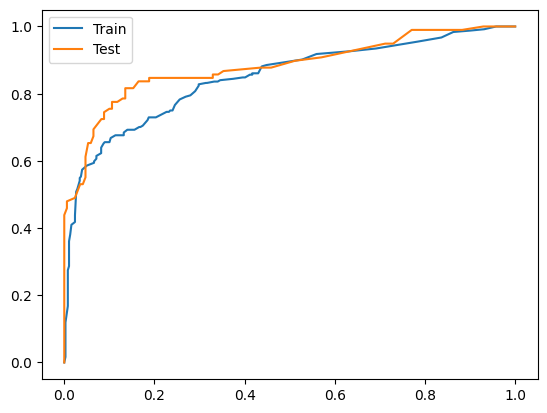

In [ ]:
tprtrain, fprtrain = roc(Y_train, y_pred_train)
tprtest, fprtest = roc(Y_test, y_pred_test)
plt.plot(fprtrain, tprtrain,label='Train')
plt.plot(fprtest, tprtest,label='Test')
plt.legend()
plt.show()

In [ ]:
print('Auc of train:',AUC(Y_train, y_pred_train))
print('Auc of test:',AUC(Y_test, y_pred_test))

Auc of train: 0.8462844413685713
Auc of test: 0.879951980792317


In [ ]:
coef_model3 = pd.DataFrame({'Feature': np.array(X_df.columns),'Coefficient': model3.w.reshape(-1)[:X_df_train.shape[1]], 'odds_ratio':np.exp(model3.w.reshape(-1)[:X_df_train.shape[1]])})
coef_model3 = pd.concat((coef_model3,pd.DataFrame({'Feature': 'Bias', 'Coefficient': model3.w[X_df.shape[1]]})),axis=0, ignore_index=True)
coef_model3

,Feature,Coefficient,odds_ratio
0,Pclass,-1.112747,0.328655
1,Age,-0.488817,0.613351
2,SibSp,-0.337022,0.713893
3,Parch,-0.064920,0.937143
4,Fare,0.046851,1.047966
5,Sex_male,-2.652369,0.070484
6,Embarked_S,-0.371158,0.689935
7,Bias,4.111490,NaN


With libary

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score

In [ ]:
model4 = LogisticRegression(penalty=None, random_state=93)
model4.fit(X_train,Y_train)
y_pred_train = model4.predict_proba(X_train)
y_pred_test = model4.predict_proba(X_test)
y_pred_trainbinary = model4.predict(X_train)
y_pred_testbinary = model4.predict(X_test)

In [ ]:
print('Accuracy of train:', accuracy_score(Y_train, y_pred_trainbinary))
print('Accuracy of test:', accuracy_score(Y_test, y_pred_testbinary))

Accuracy of train: 0.7945425361155698
Accuracy of test: 0.8507462686567164


In [ ]:
confusion_matrix(Y_train, y_pred_trainbinary)

array([[326,  53],
       [ 75, 169]])

In [ ]:
confusion_matrix(Y_test, y_pred_testbinary)

array([[155,  15],
       [ 25,  73]])

In [ ]:
fpr_train, tpr_train, threshold_train = roc_curve(Y_train, y_pred_train[:,1])
auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, threshold_test = roc_curve(Y_test, y_pred_test[:,1])
auc_test = auc(fpr_test, tpr_test)

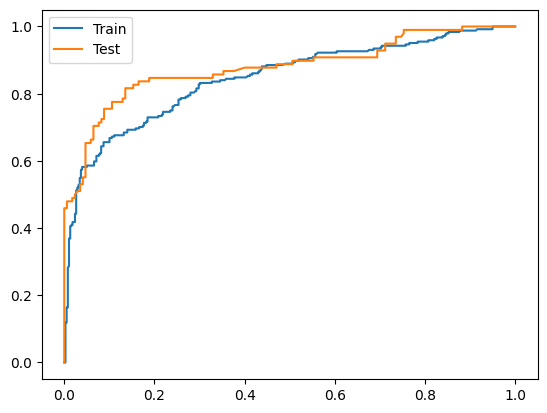

In [ ]:
plt.plot(fpr_train, tpr_train, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.legend()
plt.show()

In [ ]:
print('AUC of train:', auc_train)
print('AUC of test:', auc_test)

AUC of train: 0.8454301656646048
AUC of test: 0.8779111644657864


In [ ]:
coef_model4 = pd.DataFrame({'Feature': np.array(X_df_train.columns),'Coefficient': model4.coef_[0], 'odds_ratio': np.exp(model4.coef_[0])})
coef_model4 = pd.concat((coef_model4,pd.DataFrame({'Feature': 'Bias', 'Coefficient': model4.intercept_})),axis=0, ignore_index=True)
coef_model4

,Feature,Coefficient,odds_ratio
0,Pclass,-1.112643,0.328689
1,Age,-0.488600,0.613485
2,SibSp,-0.336901,0.713979
3,Parch,-0.064867,0.937192
4,Fare,0.046647,1.047752
5,Sex_male,-2.651091,0.070574
6,Embarked_S,-0.370906,0.690109
7,Bias,4.110109,NaN


Odds ratio

Survivel chance

In [ ]:
survivepercent(data, 'Pclass')

,Pclass,percent
0,1,62.962963
1,2,47.282609
2,3,24.236253


In [ ]:
survivepercent(data, 'Embarked')

,Embarked,percent
0,C,55.357143
1,Q,38.961039
2,S,33.900929


In [ ]:
data['Age'] = finaldata['Age']
data['Embarked'] = data['Embarked'].fillna('S')
data['Age class'] = data['Age'].apply(ageclassifier)
missvalue_count(data)

,Number,Percent
Cabin,687,77.104377


In [ ]:
def survivechance(row):
    if (row['Sex'] == 'female') and (row['Pclass'] == 1):
        return 2
    elif (row['Sex'] == 'male') and (row['Pclass'] == 3):
        return 0
    else:
        return 1

In [ ]:
data['Survive Chance'] = data.apply(survivechance, axis=1)
data.value_counts('Survive Chance')

,count
Survive Chance,
1,450
0,347
2,94


In [ ]:
X_df = data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = np.array(data['Survive Chance'])

In [ ]:
new_col = pd.get_dummies(X_df[['Sex', 'Embarked']],dtype=int,drop_first=True)
X_df = pd.concat((X_df,new_col),axis=1).drop(['Sex', 'Embarked'], axis = 1)

In [ ]:
scaler3 = standard()
X_df[['Age standard', 'Fare standard']] = scaler3.fit_transform(X_df[['Age', 'Fare']])
X = np.array(X_df.drop(['Age', 'Fare'],axis=1))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

model1 = LogisticRegression(penalty='l1', solver='saga', max_iter=5000)
model1.fit(X, Y)
selector1 = SelectFromModel(model1, prefit=True)
selected_features1 = X_df.drop(['Age', 'Fare'],axis=1).columns[selector1.get_support()]
selected_features1

Index(['SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Age standard', 'Fare standard'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import RFE

model2 = LogisticRegression()
selector2 = RFE(estimator=model2)
selector2.fit(X, Y)
selected_features2 = X_df.drop(['Age', 'Fare'],axis=1).columns[selector2.get_support()]
selected_features2

Index(['Sex_male', 'Embarked_Q', 'Fare standard'], dtype='object')

In [ ]:
X_df.drop(['Age standard','Fare standard'], axis=1, inplace=True)

In [ ]:
X_df_train, X_df_test, y_train, y_test = train_test_split(X_df, Y, test_size=0.3, random_state=93)

In [ ]:
scaler3 = standard()
X_df_train[['Age','Fare']] = scaler3.fit_transform(X_df_train[['Age','Fare']])

In [ ]:
X_df_test[['Age','Fare']] = scaler3.fit_transform(X_df_test[['Age','Fare']])

In [ ]:
X_train = np.array(X_df_train)
X_test = np.array(X_df_test)

In [ ]:
model5 = LogisticRegression(penalty=None, random_state=93)
model5.fit(X_train, y_train)
y_pred_train = model5.predict(X_train)
y_pred_test = model5.predict(X_test)

In [ ]:
print('Accuracy of train:', accuracy_score(y_train, y_pred_train))
print('Accuracy of test:', accuracy_score(y_test, y_pred_test))

Accuracy of train: 0.898876404494382
Accuracy of test: 0.9029850746268657


In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
model6 = OneVsRestClassifier(LogisticRegression(penalty=None, random_state=93))
model6.fit(X_train, y_train)
y_pred_train = model6.predict(X_train)
y_pred_test = model6.predict(X_test)

In [ ]:
print('Accuracy of train:', accuracy_score(y_train, y_pred_train))
print('Accuracy of test:', accuracy_score(y_test, y_pred_test))

Accuracy of train: 0.8747993579454254
Accuracy of test: 0.8955223880597015


In [ ]:
coeff_model5 = pd.DataFrame(model5.coef_.T, columns=[f'Class {cls}' for cls in model5.classes_], index=X_df_train.columns)
odds_rate5 = np.exp(coeff_model5)
odds_rate5.rename(columns={'Class 0':'Odds ratio0', 'Class 1':'Odds ratio1', 'Class 2':'Odds ratio2'}, inplace=True)
coeff_model5 = pd.concat((coeff_model5, odio_rate5), axis=1)
coeff_model5 = pd.concat((coeff_model5, pd.DataFrame(model5.intercept_.reshape(1,-1), columns=[f'Class {cls}' for cls in model5.classes_], index=['Bias'])), axis = 0)
coeff_model5

,Class 0,Class 1,Class 2,Odds ratio0,Odds ratio1,Odds ratio2
Age,-0.753908,0.048673,0.705235,4.705241e-01,1.049877e+00,2.024323e+00
SibSp,1.834149,0.880653,-2.714802,6.259806e+00,2.412474e+00,6.621807e-02
Parch,0.966812,0.572413,-1.539225,2.629548e+00,1.772539e+00,2.145474e-01
Fare,-9.475931,-2.283741,11.759672,7.667531e-05,1.019022e-01,1.279855e+05
Sex_male,85.878300,29.907255,-115.785555,1.979119e+37,9.739928e+12,5.187671e-51
Embarked_Q,4.037660,2.135517,-6.173176,5.669350e+01,8.461419e+00,2.084604e-03
Embarked_S,0.137274,0.475716,-0.612990,1.147142e+00,1.609166e+00,5.417286e-01
Bias,-39.482443,18.402946,21.079498,NaN,NaN,NaN


In [ ]:
coef = np.array([model6.estimators_[i].coef_[0]for i in range(3)])
bias = np.array([model6.estimators_[i].intercept_[0]for i in range(3)])

In [ ]:
coeff_model6 = pd.DataFrame(coef.T, columns=[f'Class {cls}' for cls in model6.classes_], index=X_df_train.columns)
odds_rate6 = np.exp(coeff_model6)
odds_rate6.rename(columns={'Class 0':'Odds ratio0', 'Class 1':'Odds ratio1', 'Class 2':'Odds ratio2'}, inplace=True)
coeff_model6 = pd.concat((coeff_model6, odds_rate6), axis=1)
coeff_model6 = pd.concat((coeff_model6, pd.DataFrame(bias.reshape(1,-1), columns=[f'Class {cls}' for cls in model6.classes_], index=['Bias'])), axis = 0)
coeff_model6

,Class 0,Class 1,Class 2,Odds ratio0,Odds ratio1,Odds ratio2
Age,-0.803871,0.420215,0.652500,4.475928e-01,1.522289,1.920335e+00
SibSp,0.946879,-0.069660,-3.523303,2.577652e+00,0.932711,2.950184e-02
Parch,0.387737,0.349940,-2.052138,1.473642e+00,1.418983,1.284599e-01
Fare,-7.133928,-0.236755,13.813675,7.975805e-04,0.789184,9.981658e+05
Sex_male,15.268958,-1.324695,-130.873630,4.277835e+06,0.265884,1.453130e-57
Embarked_Q,1.919495,-0.147404,-9.374915,6.817516e+00,0.862945,8.482542e-05
Embarked_S,-0.329020,0.008964,-1.132768,7.196283e-01,1.009004,3.221402e-01
Bias,-17.168395,0.948186,2.678094,NaN,NaN,NaN
